# Euro24 Player Analysis Project

## Introduction
The goal of this project is to analyze the Euro24 dataset, which contains detailed information about players participating in Euro 2024. The dataset includes player names, positions, ages, clubs, heights, preferred foot, number of caps (appearances), goals, market value, and country. This analysis seeks to answer the following questions:

1. Who are the top 10 most valuable players in the tournament?
2. What is the average age and market value of players in different positions?
3. Which clubs are sending the most players to the tournament?
4. How does the number of caps a player has correlate with their market value?
5. Which countries have the highest average market value per player?

By focusing on these objectives, the project provides insights into player performance, team compositions, market trends, and potential recruitment targets.


## Step 1: Import Libraries and Load Data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("euro2024_players.csv")

## Step 2: Data Inspection and Preparation

### Inspecting the Dataset

In [5]:
# Initial inspection
df.head()


,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [6]:
df.shape

(623, 10)

In [7]:
df.columns

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [9]:
# Fill missing values in the 'Foot' column
df['Foot'] = df['Foot'].fillna('right')
print("Missing values in 'Foot' column filled with 'right'.")

Missing values in 'Foot' column filled with 'right'.


In [10]:
# Check for duplicates
df.duplicated().sum()
print("No duplicate rows found.")

No duplicate rows found.


### Summary Statistics

In [11]:
# Summary statistics
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


<Figure size 2000x2000 with 0 Axes>

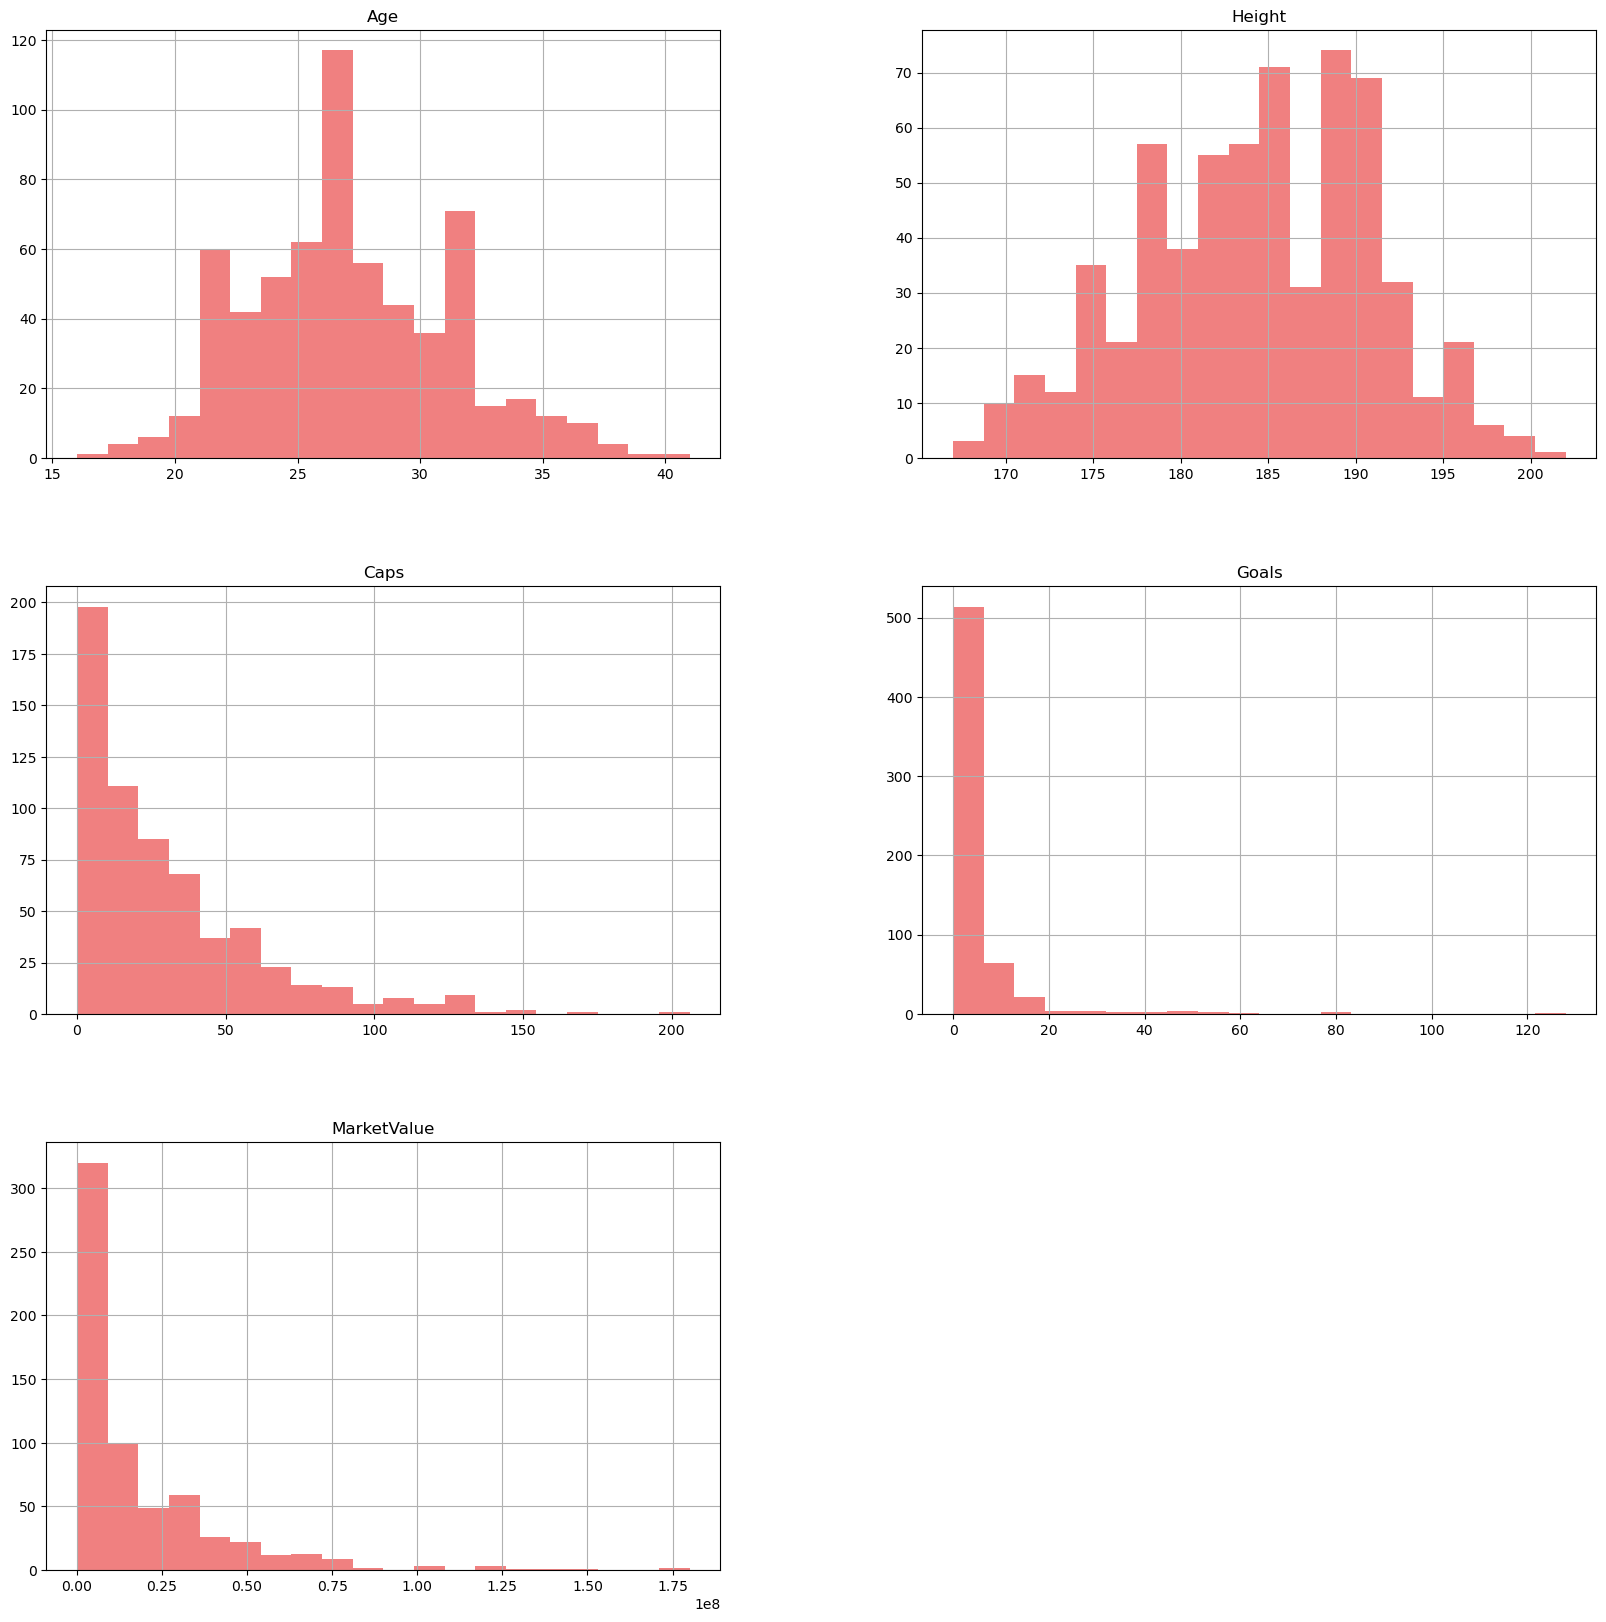

In [12]:
# Visualize distributions
plt.figure(figsize=(20, 20))
df.hist(bins=20, figsize=(20, 20), color='lightcoral')
plt.show()

## Step 3: Player Analysis

### Identify Key Players

#### Top 10 Most Valuable Players

In [13]:
# Sort players by market value
top_market_value_players = df.sort_values(by='MarketValue', ascending=False).head(10)

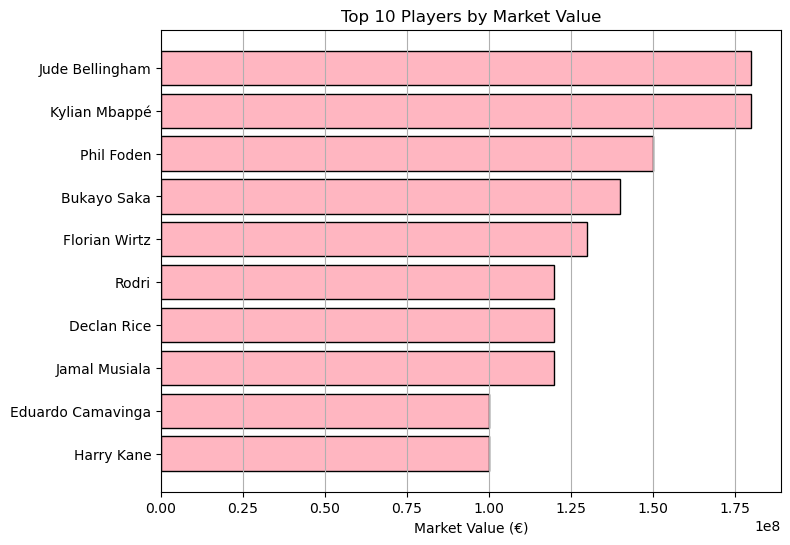

In [14]:
# Plot
plt.figure(figsize=(8, 6))
plt.barh(top_market_value_players['Name'], top_market_value_players['MarketValue'], color='lightpink', edgecolor='black')
plt.xlabel('Market Value (€)')
plt.title('Top 10 Players by Market Value')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

#### Top 10 Goal Scorer

In [15]:
# Sort players by goals
top_goals_players = df.sort_values(by='Goals', ascending=False).head(10)

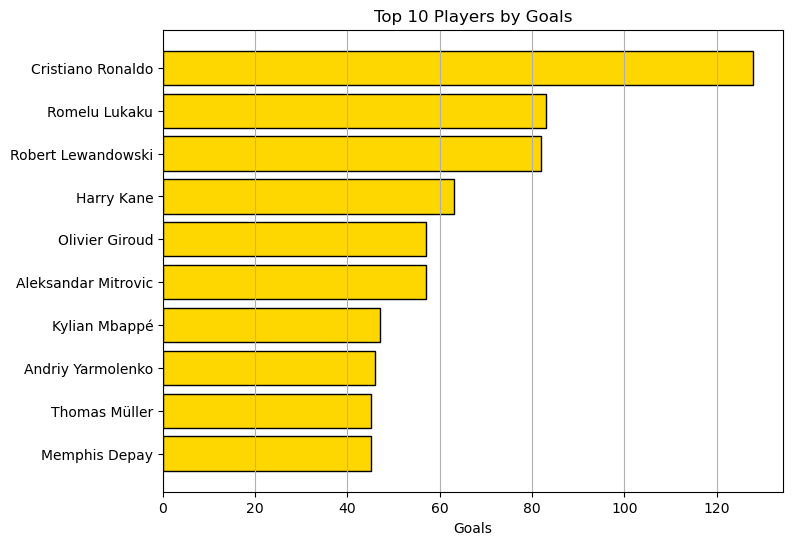

In [16]:
# Plot
plt.figure(figsize=(8, 6))
plt.barh(top_goals_players['Name'], top_goals_players['Goals'], color='gold', edgecolor='black')
plt.xlabel('Goals')
plt.title('Top 10 Players by Goals')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

#### Top 10 Players by Caps

In [17]:
# Sort players by caps
top_caps_players = df.sort_values(by='Caps', ascending=False).head(10)

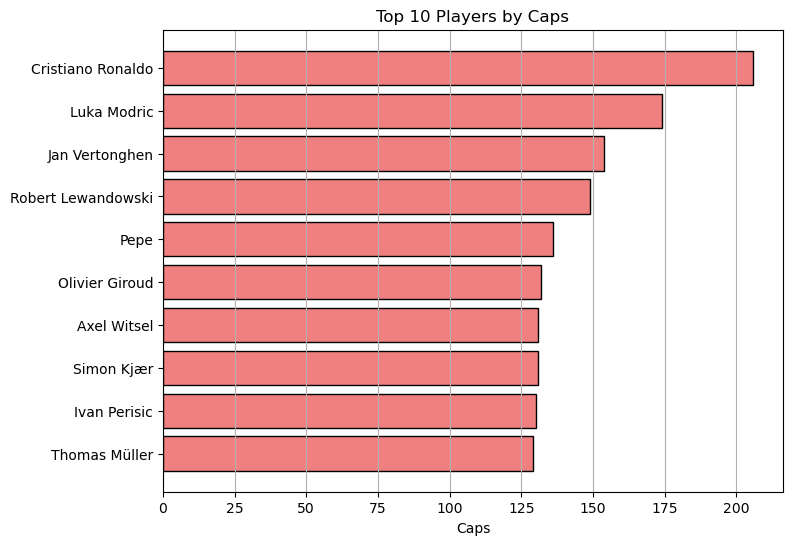

In [18]:
# Plot
plt.figure(figsize=(8, 6))
plt.barh(top_caps_players['Name'], top_caps_players['Caps'], color='lightcoral', edgecolor='black')
plt.xlabel('Caps')
plt.title('Top 10 Players by Caps')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

### Age and Performance

#### Correlations

In [19]:
# Calculate correlations
correlation_age_market_value = df['Age'].corr(df['MarketValue'])
correlation_age_goals = df['Age'].corr(df['Goals'])
correlation_age_caps = df['Age'].corr(df['Caps'])

In [21]:
print(f'Correlation between Age and Market Value: {correlation_age_market_value}')
print(f'Correlation between Age and Goals: {correlation_age_goals}')
print(f'Correlation between Age and Caps: {correlation_age_caps}')

Correlation between Age and Market Value: -0.3310673639344214
Correlation between Age and Goals: 0.3101442350703538
Correlation between Age and Caps: 0.6428287578307972


#### Visualizations

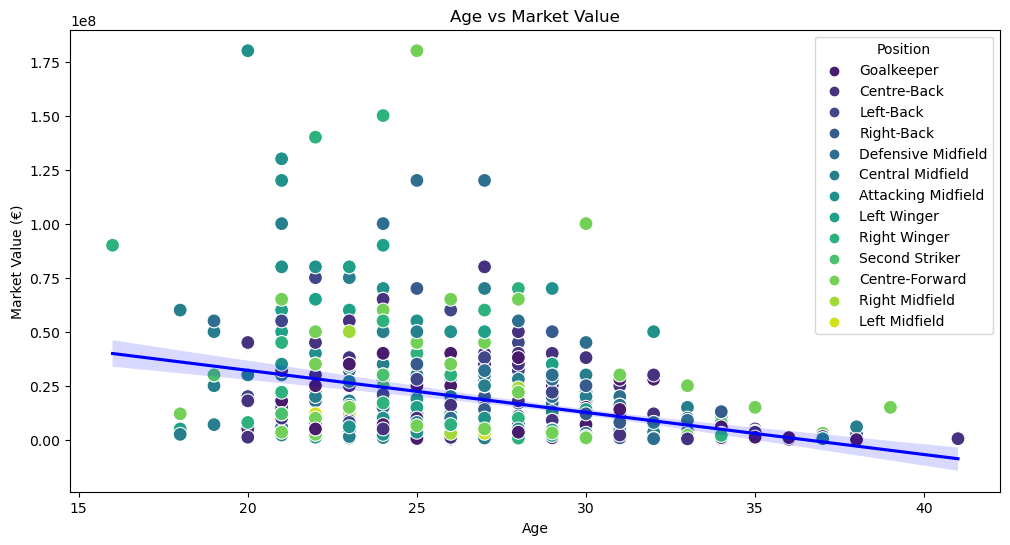

In [22]:
# Age vs Market Value
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age'], y=df['MarketValue'], hue=df['Position'], palette='viridis', s=100)
sns.regplot(x='Age', y='MarketValue', data=df, scatter=False, color='blue')
plt.title('Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.show()

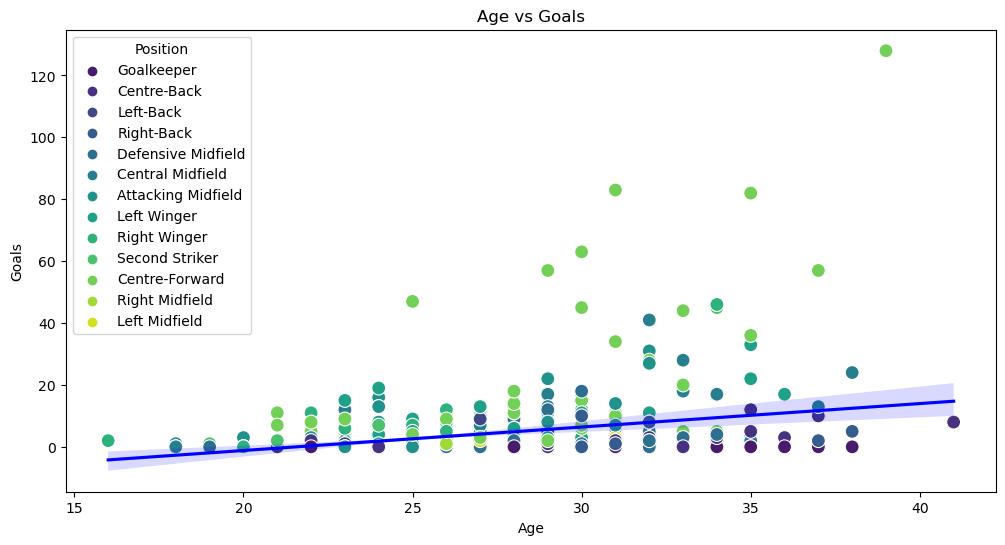

In [23]:
# Age vs Goals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age'], y=df['Goals'], hue=df['Position'], palette='viridis', s=100)
sns.regplot(x='Age', y='Goals', data=df, scatter=False, color='blue')
plt.title('Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

## Step 4: Team and Country Analysis

#### Market Value by Country

In [24]:
country_market_value = df.groupby(by='Country')['MarketValue'].sum().reset_index()
country_market_value.sort_values(by='MarketValue', ascending=False, inplace=True)

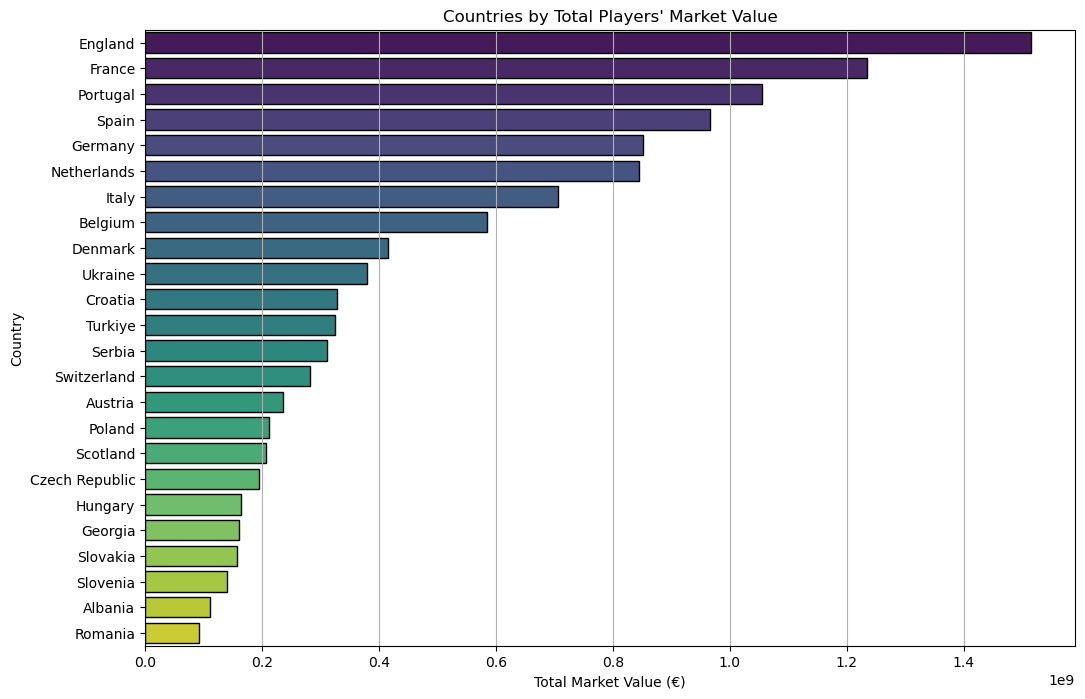

In [25]:
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='MarketValue', y='Country', data=country_market_value, palette='viridis', edgecolor='black')
plt.xlabel('Total Market Value (€)')
plt.title('Countries by Total Players\' Market Value')
plt.grid(axis='x')
plt.show()

#### Goals and Caps by Country

In [28]:
# Total Goals by Country
total_goals_by_country = df.groupby('Country')['Goals'].sum().sort_values(ascending=False).reset_index()
total_goals_by_country.sort_values(by='Goals', ascending=False, inplace=True)

In [29]:
# Display sum of caps by the country
total_goals_by_country[['Country', 'Goals']]

,Country,Goals
0,Portugal,225
1,France,192
2,Belgium,177
3,Poland,154
4,Croatia,147
5,Netherlands,141
6,Denmark,135
7,Germany,134
8,Serbia,129
9,Switzerland,125


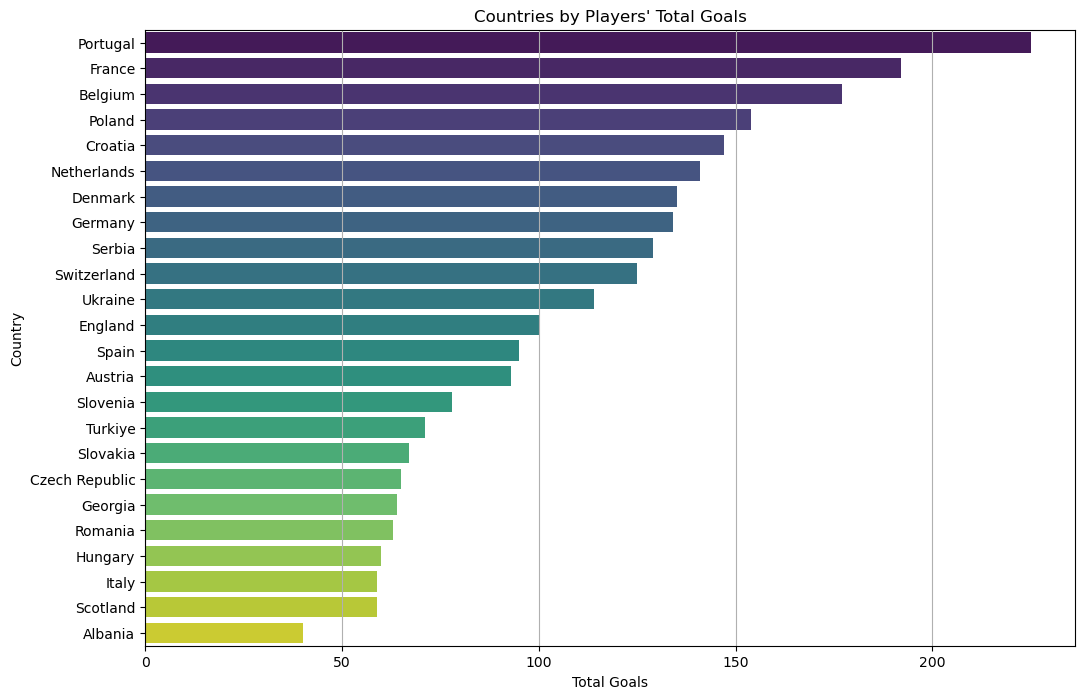

In [30]:
# Plot the total goals by country
plt.figure(figsize=(12, 8))
sns.barplot(x='Goals', y='Country', data=total_goals_by_country, palette='viridis')
plt.xlabel('Total Goals')
plt.title('Countries by Players\' Total Goals')
plt.grid(axis='x')
plt.show()

In [31]:
# Total Caps by Country
total_caps_by_country = df.groupby('Country')['Caps'].sum().sort_values(ascending=False).reset_index()
total_caps_by_country.sort_values(by='Caps', ascending=False, inplace=True)

In [32]:
# Display sum of caps by the country
total_caps_by_country[['Country', 'Caps']]

,Country,Caps
0,Croatia,1152
1,Portugal,1113
2,Switzerland,1092
3,Denmark,1071
4,Belgium,949
5,Germany,906
6,Slovakia,862
7,Serbia,860
8,Ukraine,849
9,Netherlands,838


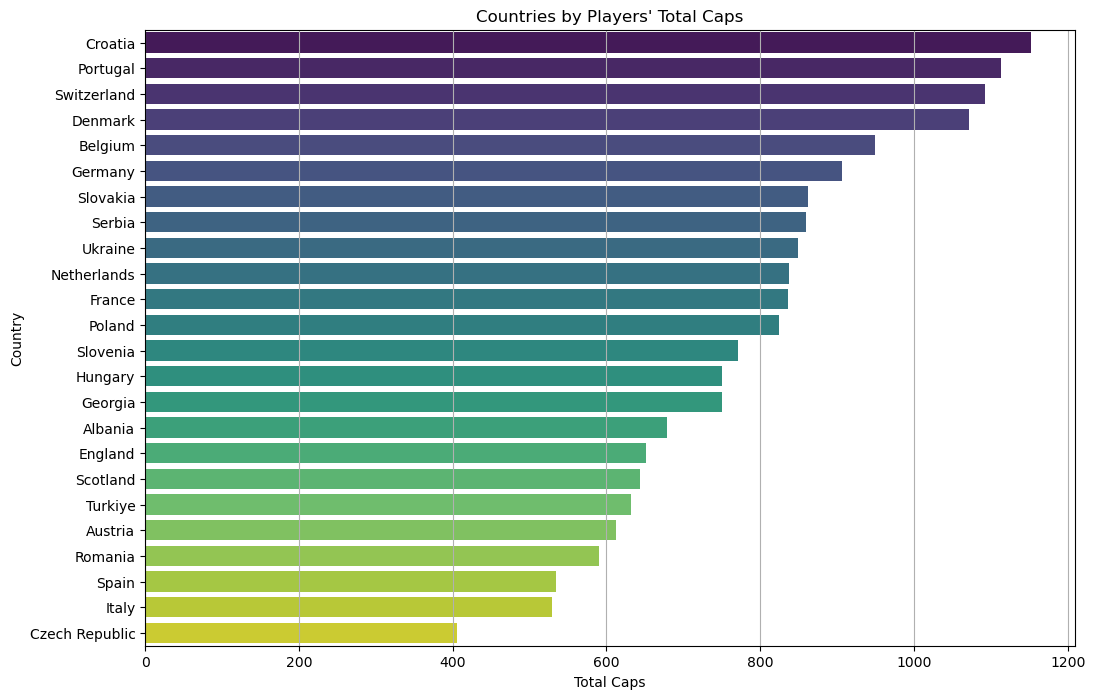

In [33]:
# Plot the total caps by country
plt.figure(figsize=(12, 8))
sns.barplot(x='Caps', y='Country', data=total_caps_by_country, palette='viridis')
plt.xlabel('Total Caps')
plt.title('Countries by Players\' Total Caps')
plt.grid(axis='x')
plt.show()

## Step 5: General Insights and Patterns

Correlation between Height and Market Value: -0.0709833376522987
Correlation between Height and Goals: -0.018784965333945837
Correlation between Height and Caps: -0.051479409070671764


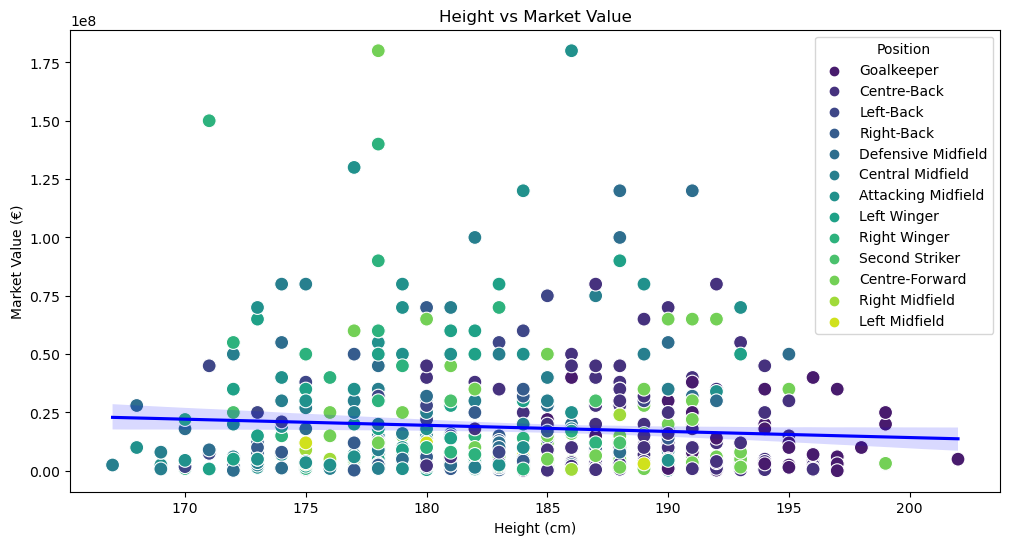

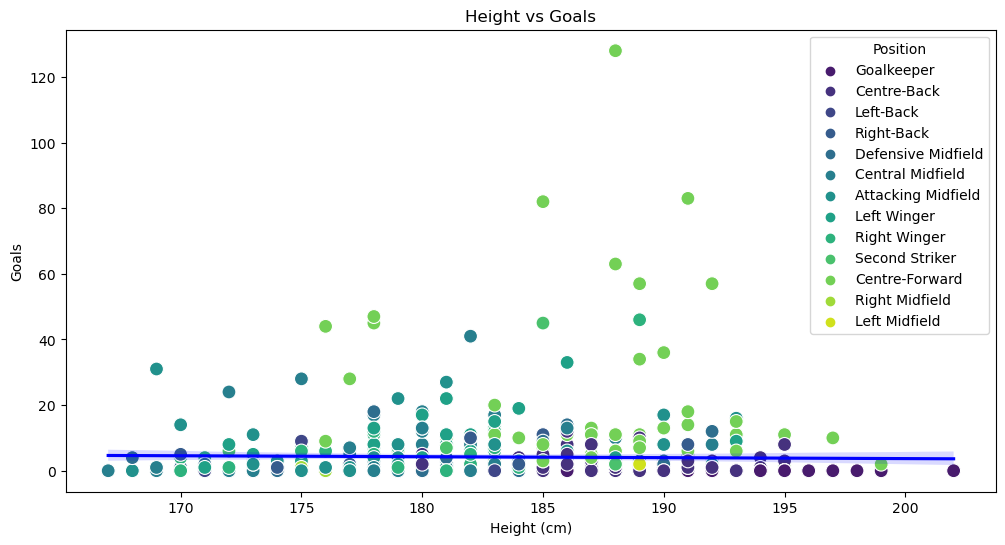

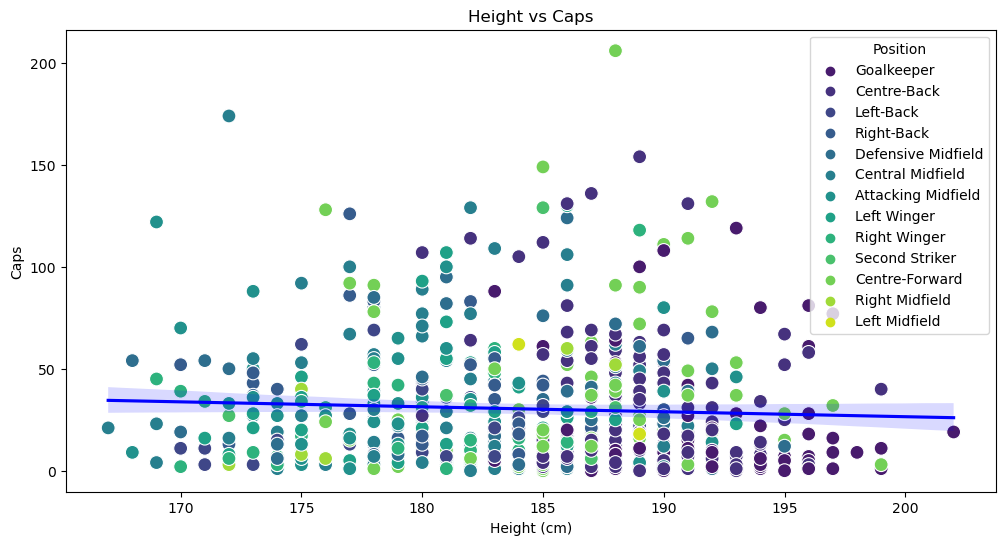

In [35]:
correlation_height_market_value = df['Height'].corr(df['MarketValue'])
correlation_height_goals = df['Height'].corr(df['Goals'])
correlation_height_caps = df['Height'].corr(df['Caps'])

print(f'Correlation between Height and Market Value: {correlation_height_market_value}')
print(f'Correlation between Height and Goals: {correlation_height_goals}')
print(f'Correlation between Height and Caps: {correlation_height_caps}')

# Scatter plot for Height vs Market Value
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Height', y='MarketValue', data=df, hue='Position', palette='viridis', s=100)
sns.regplot(x='Height', y='MarketValue', data=df, scatter=False, color='blue')
plt.title('Height vs Market Value')
plt.xlabel('Height (cm)')
plt.ylabel('Market Value (€)')
plt.show()

# Scatter plot for Height vs Goals
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Height', y='Goals', data=df, hue='Position', palette='viridis', s=100)
sns.regplot(x='Height', y='Goals', data=df, scatter=False, color='blue')
plt.title('Height vs Goals')
plt.xlabel('Height (cm)')
plt.ylabel('Goals')
plt.show()

# Scatter plot for Height vs Caps
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Height', y='Caps', data=df, hue='Position', palette='viridis', s=100)
sns.regplot(x='Height', y='Caps', data=df, scatter=False, color='blue')
plt.title('Height vs Caps')
plt.xlabel('Height (cm)')
plt.ylabel('Caps')
plt.show()

In [36]:
# Calculate Market Value by Position  
marketValue_by_position = df.groupby('Position')['MarketValue'].mean().reset_index()
marketValue_by_position.sort_values(by='MarketValue', ascending=False, inplace=True)

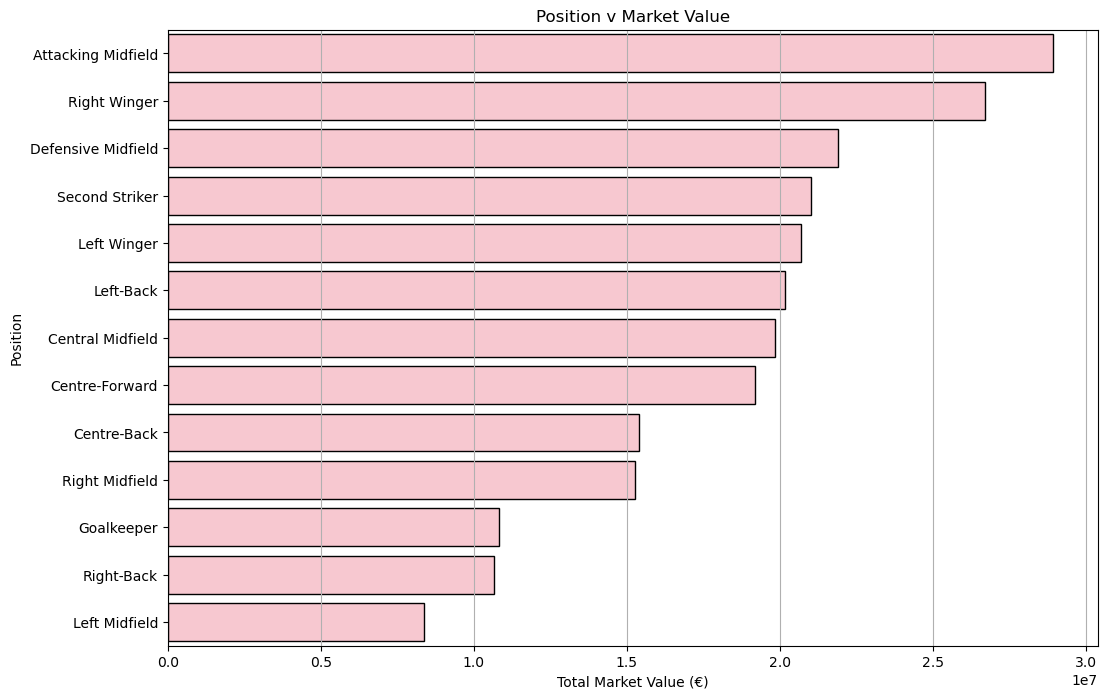

In [37]:
# Barplot for Market Value v Position  
plt.figure(figsize=(12, 8))
sns.barplot(x='MarketValue', y='Position', data=marketValue_by_position, color='pink', edgecolor='black', errorbar=None)
plt.xlabel('Total Market Value (€)')
plt.title('Position v Market Value')
plt.grid(axis='x')
plt.show()

In [38]:
# Calculate Age by Position  
age_by_position = df.groupby('Position')['Age'].mean().reset_index()
age_by_position.sort_values(by='Age', ascending=False, inplace=True)

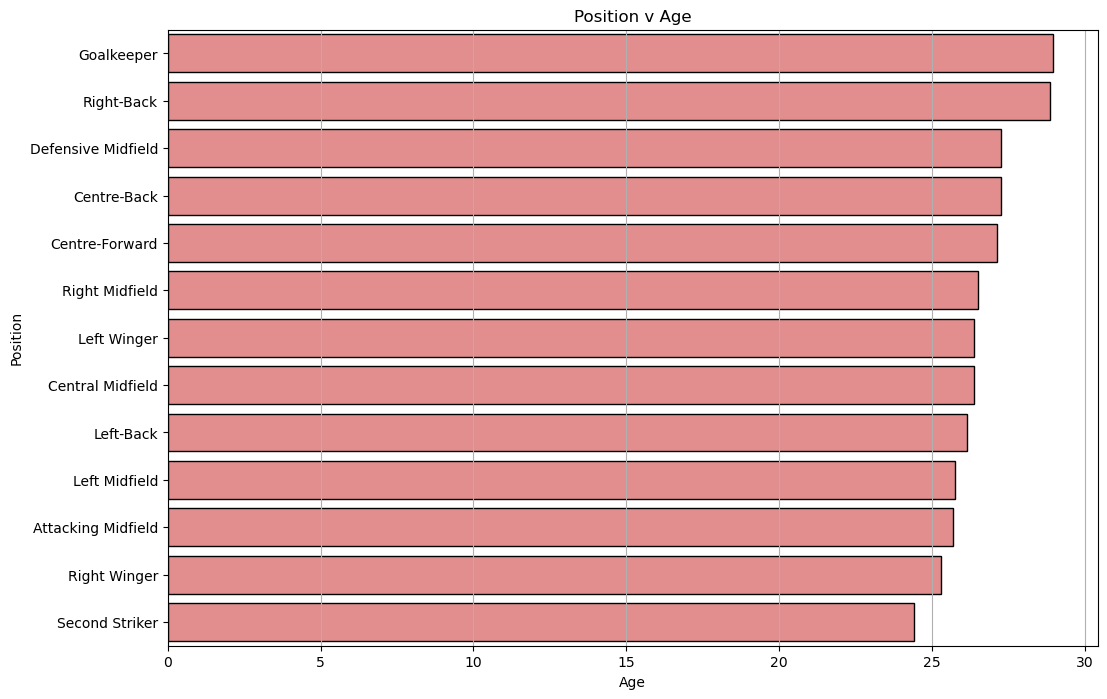

In [39]:
# Barplot for Age v Position 
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Position', data=age_by_position, color='lightcoral', edgecolor='black', errorbar=None)
plt.xlabel('Age')
plt.title('Position v Age')
plt.grid(axis='x')
plt.show()

In [40]:
# Calculate Height by Position  
height_by_position = df.groupby('Position')['Height'].mean().reset_index()
height_by_position.sort_values(by='Height', ascending=False, inplace=True)

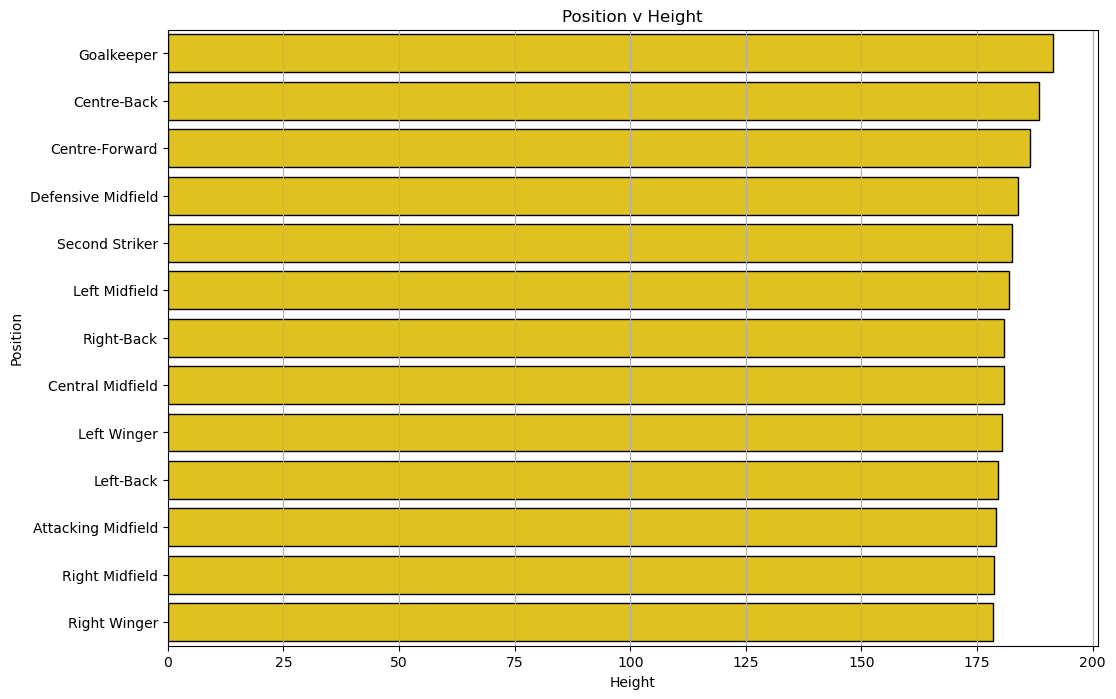

In [41]:
# Barplot for Height v Position 
plt.figure(figsize=(12, 8))
sns.barplot(x='Height', y='Position', data=height_by_position, color='gold', edgecolor='black', errorbar=None)
plt.xlabel('Height')
plt.title('Position v Height')
plt.grid(axis='x')
plt.show()

# Conclusions and Insights

- The dataset contains 623 players.
- The "Position" column has 13 unique positions with "Centre-Back" being the most common.
- The "Club" column has 219 unique clubs with "Manchester City" having the most players (13).
- Players' ages range from 16 to 41 with a average age of approximately 27.Heights range from 167 cm to 202 cm with a mean height of approximately 184 cm.
- The "Caps" (appearances) range from 0 to 206 with a mean of approximately 30.
- The number of goals ranges from 0 to 128 with a mean of about 4.
- Market values range from €50,000 to €180,000,000 with a mean of approximately €18,409,030.
- There are 24 unique countries with Poland having the highest representation (27 players).


This analysis provides insights for recruiters, analysts, and enthusiasts interested in the dynamics of Euro 2024.
